# Working with API's

An **API** (application programming interface) is a collection of tools that allows different applications to interact. Some of the biggest names on the web (like Reddit, Spotify, Twitter, and Facebook) offer free APIs to make the valuable data on their servers available.

Organizations host their APIs on **web servers**. When you type `www.google.com` in your browser's address bar, your computer is actually asking the `www.google.com` server for a web page; the server returns the page to your browser.

APIs work much the same way, except instead of your web browser asking for a web page, your **program asks for data**. The API usually **returns data in JavaScript Object Notation (JSON) format**.

We make an API request to the web server with the data we want. The server then replies and sends it to us. In Python, we do this using the `requests` library.

## GET Request

There are many different types of requests. The most common is a `GET` request, which we **use to retrieve data**.

An **endpoint** is a server route for retrieving specific data from an API. For example, the `/comments` endpoint on the reddit API might retrieve information about comments, while the `/users` endpoint might retrieve data about users.

The server will send a **status code indicating the success or failure of request**. You can get the status code of the response from `response.status_code`.

In [ ]:
# Make a get request to get the latest position of the ISS from the OpenNotify API.
response = requests.get("http://api.open-notify.org/iss-now.json")
status_code = response.status_code
status_code

200

The request we just made returned a status code of `200`. Web servers return status codes every time they receive an API request. A status code reports what happened with a request. Here are some codes that are relevant to `GET` requests:

1. `200` — Everything went okay, and the server returned a result (if any).
2. `301` — The server is redirecting you to a different endpoint. This can happen when a company switches domain names, or when an endpoint's name has changed.
3. `401` — The server thinks you're not authenticated. This happens when you don't send the right credentials to access an API.
4. `400` — The server thinks you made a bad request. This can happen when you don't send the information that the API requires to process your request (among other things).
5. `403` — The resource you're trying to access is forbidden, and you don't have the right permissions to see it.
6. `404` — The server didn't find the resource you tried to access.

Making a GET request to http://api.open-notify.org/iss-pass.json

In [ ]:
request = requests.get('http://api.open-notify.org/iss-pass')
status_code = request.status_code

404

`iss-pass` wasn't a valid endpoint, so the API's server sent us a 404 status code in response. We forgot to add .json at the end

In [ ]:
request = requests.get('http://api.open-notify.org/iss-pass.json')
status_code = request.status_code

400

## response.content

In the last example, we got a 400 status code, which indicates a bad request. If we look at the documentation for the OpenNotify API, we see that the ISS Pass endpoint requires two parameters.

The ISS Pass endpoint tells us when the ISS will pass over a given location on the Earth.

To request this information, we need to pass the coordinates for a specific location to the API. We do this by passing two parameters: latitude and longitude.

To do this, we can add an optional keyword argument, `params`, to our `request`. In this case, we need to pass in two parameters:

1. `lat` — the latitude of the location
2. `lon` — the longitude of the location

We can make a dictionary that contains these parameters, and then pass them into the function.

`response.content`: To retrieve the content of the response

In [ ]:
import requests

parameters = {"lat": 37.78 , "lon": -122.41}

# Make a get request with the parameters.
response = requests.get("http://api.open-notify.org/iss-pass.json", params=parameters)

content = response.content

print(content)

b'{\n  "message": "success", \n  "request": {\n    "altitude": 100, \n    "datetime": 1441417753, \n    "latitude": 37.78, \n    "longitude": -122.41, \n    "passes": 5\n  }, \n  "response": [\n    {\n      "duration": 369, \n      "risetime": 1441456672\n    }, \n    {\n      "duration": 626, \n      "risetime": 1441462284\n    }, \n    {\n      "duration": 581, \n      "risetime": 1441468104\n    }, \n    {\n      "duration": 482, \n      "risetime": 1441474000\n    }, \n    {\n      "duration": 509, \n      "risetime": 1441479853\n    }\n  ]\n}'

## json Library

The above info is a `string`. Strings are how we pass information back and forth through APIs, but it's not easy to get the information we want out of them.

JSON format encodes data structures like lists and dictionaries as strings to ensure that machines can read them easily. **JSON is the main format for sending and receiving data through APIs.**

Python offers great support for JSON through its **`json` library**. We can **convert lists and dictionaries to JSON, and vice versa**. The above result is a dictionary encoded as a string in JSON format.

The JSON library has two main methods:

1. `dumps` — takes in a Python object and converts it to a string
2. `loads` — takes in a JSON string and converts it to a Python object

In [ ]:
# Make a list of fast food chains.
best_food_chains = ["Taco Bell", "Shake Shack", "Chipotle"]
print(type(best_food_chains))

# Import the JSON library.
import json

# Use json.dumps to convert best_food_chains to a string.
best_food_chains_string = json.dumps(best_food_chains)
print(type(best_food_chains_string))

# Convert best_food_chains_string back to a list.
print(type(json.loads(best_food_chains_string)))

<class 'list'>
<class 'str'>
<class 'list'>


In [ ]:
# Make a dictionary
fast_food_franchise = {
    "Subway": 24722,
    "McDonalds": 14098,
    "Starbucks": 10821,
    "Pizza Hut": 7600
}

# We can also dump a dictionary to a string and load it.
fast_food_franchise_string = json.dumps(fast_food_franchise)
print(type(fast_food_franchise_string))

fast_food_franchise_2 = json.loads(fast_food_franchise_string)
print(type(fast_food_franchise_2))

<class 'str'>
<class 'dict'>


We can get the **content of a response as a Python object** by using the `.json()` method on the response; `dict` type response, otherwise returns as a string using `.content`

In [ ]:
parameters = {"lat": 37.78, "lon": -122.41}
response = requests.get("http://api.open-notify.org/iss-pass.json", params=parameters)

# Get the response data as a Python object.  Verify that it's a dictionary.
json_data = response.json()
print(type(json_data))
print(json_data)

<class 'dict'>

{'request': {'altitude': 100, 'latitude': 37.78, 'passes': 5, 'datetime': 1441417753, 'longitude': -122.41},

'message': 'success',

'response': [{'risetime': 1441456672, 'duration': 369},
{'risetime': 1441462284, 'duration': 626}, {'risetime': 1441468104, 'duration': 581}, {'risetime': 1441474000, 'duration': 482}, {'risetime': 1441479853, 'duration': 509}]}

To get the duration value of the ISS's first pass over San Francisco:

In [ ]:
json_data['response'][0]['duration']

## response.headers

The server sends more than a status code and the data when it generates a response. It also sends **metadata** with **information on how it generated the data and how to decode it**. This information appears in the *response headers*. We can access it using the `.headers` property.

The headers will appear as a `dictionary`. For now, the `content-type` within the headers is the most important key. It **tells us the format of the response, and how to decode it**. For the OpenNotify API, the format is JSON, so we were able to decode it with JSON earlier.

In [ ]:
# Headers is a dictionary
print(response.headers)

{'connection': 'keep-alive', 'server': 'gunicorn/19.3.0', 'via': '1.1 vegur', 'date': 'Sat, 05 Sep 2015 01:49:13 GMT', 'content-length': '520', 'content-type': 'application/json'}

In [ ]:
header = response.headers
content_type = header['content-type']

application/json

## Example

OpenNotify has one more API endpoint, `astros.json`. It tells us how many people are currently in space. To find the number of people currently in space:

In [ ]:
request = requests.get("http://api.open-notify.org/astros.json")
info = request.json()
print(info)

{'number': 10, 'people': [{'name': 'Sergey Prokopyev', 'craft': 'ISS'}, {'name': 'Dmitry Petelin', 'craft': 'ISS'}, {'name': 'Frank Rubio', 'craft': 'ISS'}, {'name': 'Stephen Bowen', 'craft': 'ISS'}, {'name': 'Warren Hoburg', 'craft': 'ISS'}, {'name': 'Sultan Alneyadi', 'craft': 'ISS'}, {'name': 'Andrey Fedyaev', 'craft': 'ISS'}, {'name': 'Jing Haiping', 'craft': 'Tiangong'}, {'name': 'Gui Haichow', 'craft': 'Tiangong'}, {'name': 'Zhu Yangzhu', 'craft': 'Tiangong'}], 'message': 'success'}


In [ ]:
in_space_count = info['number']
in_space_count

10

# Intermediate API's

Previously used API's didn't require authentication, but most do. Imagine that you're using the reddit API to pull a list of your private messages. It would be a huge privacy breach for reddit to give that information to anyone, so requiring authentication makes sense.

APIs also use authentication for rate limiting. Developers typically use APIs to build interesting applications or services. To make sure an API is available and responsive for all users, it will prevent you from making too many requests too quickly. We call this restriction rate limiting.

# Web Scraping

One way to access the data without waiting for the provider to create an API on the internet is to use a technique called web scraping.

Web scraping loads a web page into Python so we can extract the information we want. We can then work with the data using standard analysis tools like pandas and numpy.

We'll use the `requests` library often as we learn about web scraping - library enables us to **download a web page**

We'll also use the `beautifulsoup` library to **extract the relevant parts of the web page.**

## Web Page Structure

Web pages use **HyperText Markup Language (HTML)**. HTML isn't a programming language like Python. It's a markup language with its own syntax and rules. When a web browser like Chrome or Firefox downloads a web page, it reads the HTML to determine how to render and display it.

Example:  http://dataquestio.github.io/web-scraping-pages/simple.html

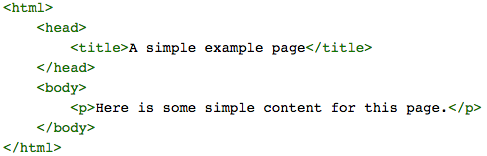

HTML documents contain a few major sections. The **head** section contains information that's useful to the web browser that's rendering the page. (The user doesn't see it.) The **body** section contains the bulk of the content you will see in your browser.

Different tags have different purposes. For example, the `title` tag tells the browser what to display at the top of your tab. The `p` tag indicates that the content inside it is a single paragraph.

HTML consists of tags. We open a tag like this:

`<p>`

We close a tag like this:

`</p>`

**Anything in between the opening and closing of a tag is the content of that tag.**

We can nest tags to create complex formatting rules. Here's an example:

image.png

In [ ]:
import requests

response = requests.get('http://dataquestio.github.io/web-scraping-pages/simple.html')
content = response.content
print(type(content))
print(content)

<class 'bytes'>
b'<!DOCTYPE html>\n<html>\n    <head>\n        <title>A simple example page</title>\n    </head>\n    <body>\n        <p>Here is some simple content for this page.</p>\n    </body>\n</html>'


## BeautifulSoup

We'll use the `BeautifulSoup` library to parse the web page with Python. This library **allows us to extract tags from an HTML document.**

We can think of **HTML documents** as "**trees**," and the **nested tags** as "**branches**" (similar to a family tree). **BeautifulSoup works the same way.**
If we look at this page, for example, the root of the "tree" is the html tag:

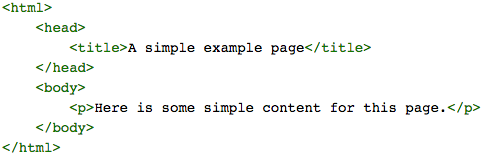

### Tag Property

The html tag contains two "branches," `head` and `body`. `head` contains one "branch", `title` and `body` contains one branch, `p`. Drilling down through these multiple branches is one way to parse a web page.

To extract the text inside the `p` tag, we need to get the body element, then the `p` element, and then finally the text inside the `p` element.

In [ ]:
from bs4 import BeautifulSoup

# Initialize the parser, and pass in the content we grabbed earlier.
parser = BeautifulSoup(content, 'html.parser')

# Get the body tag from the document.
# Since we passed in the top level of the document to the parser, we need to pick a branch off of the root.
# With BeautifulSoup, we can access branches by using tag types as attributes.
# parser has two branches: head & body
body = parser.body

# Get the p tag from the body.
p = body.p

# Print the text inside the p tag.
# Text is a property that gets the inside text of a tag.
print(p.text)

Here is some simple content for this page.


In [ ]:
parser.body.p.text

'Here is some simple content for this page.'

In [ ]:
parser.head

<head>
<title>A simple example page</title>
</head>

In [ ]:
parser.head.title.text

'A simple example page'

### `find_all` method

Use the tag type as a property is not always the best way to parse a document. It's usually better to be more specific by using the `find_all` method. This method will find all occurrences of a tag in the current element, and return a list.

If we only want the first occurrence of an item, we'll need to index the list to get it. Aside from this difference, the process is the same as passing in the tag type as an attribute.

In [ ]:
parser = BeautifulSoup(content, 'html.parser')

# Get a list of all occurrences of the body tag in the element.
body = parser.find_all("body")

# Get the paragraph tag.
p = body[0].find_all("p")

# Get the text.
print(p[0].text)

Here is some simple content for this page.


In [ ]:
body

[<body>
 <p>Here is some simple content for this page.</p>
 </body>]

In [ ]:
p

[<p>Here is some simple content for this page.</p>]

### Element ID's

HTML allows elements to have IDs. Because they are unique, we can use an ID to refer to a specific element.

Here's an example page:

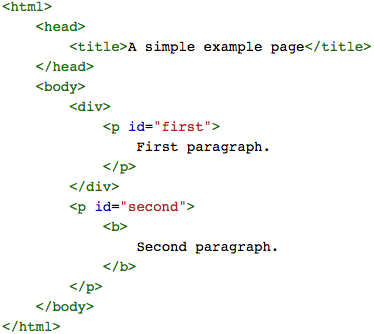

HTML uses the `div` tag to create a divider that splits the page into logical units. We can think of a divider as a "box" that contains content. For example, different dividers hold a web page's footer, sidebar, and horizontal menu.

There are two paragraphs on this page. The first is nested inside a `div`. Luckily, the paragraphs have IDs. This means we can access them easily, even though they're nested.

Let's use the `find_all` method to access those paragraphs, and pass in the additional id attribute.

In [ ]:
# Get the page content and set up a new parser.
response = requests.get("http://dataquestio.github.io/web-scraping-pages/simple_ids.html")
content = response.content
parser = BeautifulSoup(content, 'html.parser')

# Pass in the ID attribute to only get the element with that specific ID.
first_paragraph = parser.find_all("p", id="first")[0]
print(first_paragraph.text)


                First paragraph.
            


### Element Classes

In HTML, elements can also have **classes**. Instances of classes aren't necessarily unique. **Many different elements can belong to the same class, usually because they share a common purpose or characteristic.**

For example, you may want to create three dividers to display three of your photographs. You can create a common look and feel for these dividers, such as a border and caption style.

This is when you use a class. You could create a class called "gallery," define a style for it once using CSS , and then apply that class to all of the dividers you'll use to display photos. **One element can even have multiple classes.**


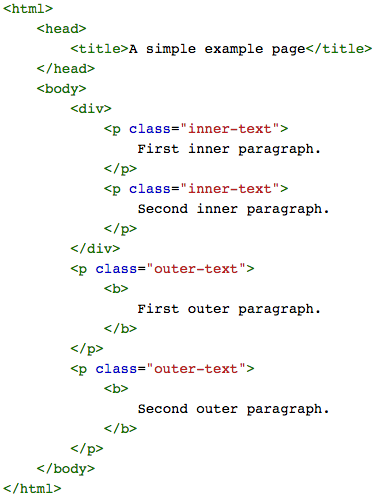

We can use find_all to select elements by class. We'll just need to pass in the `class_` parameter.

In [ ]:
# Get the website that contains classes.
response = requests.get("http://dataquestio.github.io/web-scraping-pages/simple_classes.html")
content = response.content
parser = BeautifulSoup(content, 'html.parser')

# Get the first inner paragraph.
# Find all the paragraph tags with the class inner-text.
# Then, take the first element in that list.
parser.find_all("p", class_="inner-text")

[<p class="inner-text">
                 First paragraph.
             </p>,
 <p class="inner-text">
                 Second paragraph.
             </p>]

In [ ]:
parser.find_all("p", class_="inner-text")[0]

<p class="inner-text">
                First paragraph.
            </p>

In [ ]:
parser.find_all("p", class_="inner-text")[0].text

'\n                First paragraph.\n            '

In [ ]:
second_inner_paragraph_text = parser.find_all('p', class_='inner-text')[1].text

first_outer_paragraph_text = parser.find_all('p', class_='outer-text')[0].text

print(second_inner_paragraph_text, first_outer_paragraph_text)


                Second paragraph.
             

                First outer paragraph.
            

